# Дана таблица клиентов с различной информацией относительно предпочтений покупок, частоты и сумм. Необходимо провести сегментацию клиентов для выделения различных групп.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from datetime import date, timedelta
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing



In [20]:
#Путь файла укажите свой
path = 'C:/Users/egork/Desktop/Data Science/Technical tasks/Parimatch/for_clustering.xlsx'
df = pd.read_excel(path)

In [21]:
#Принтим первые 5 строк
df.head()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth
0,5743,269.5328,46,2,102.9252,119,12398.51,1114,26,4,...,80,1004.370,0.081007,1,1,60,12,963.01,1,1
1,5756,359.9902,36,4,100.2813,130,12959.65,1024,29,3,...,46,476.475,0.036766,1,0,91,15,1534.69,1,1
2,5781,329.3200,9,4,102.2027,29,2963.88,170,24,1,...,17,334.840,0.112974,1,1,13,2,1514.48,1,1
3,5801,385.8105,51,8,48.8550,404,19676.34,2486,33,3,...,64,539.250,0.027406,1,0,68,35,1872.24,1,1
4,5808,310.2800,8,4,108.5789,25,2482.24,255,26,2,...,11,106.210,0.042788,1,1,22,3,557.97,1,1


In [22]:
df.describe()

,Id_client,InWeek_amount,InWeek_SKU,Checkinmonth_average,Checkamount_mean,Count_transac,Total_amount,Total_SKU_qnt,Count_departments,Count_shop,...,Cat_babyprod_qnt,Cat_babyprod_amount,Cat_babyprod_share,Communication_3month,Response_communcation,SKU_LastMonthqnt,Checks_LastMonthqnt,Amount_LastMonth,Discount,Discount_LastMonth
count,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,...,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000,27508.000000
mean,210314.227534,314.792325,31.457212,2.565363,159.516226,82.467500,9595.761182,764.242293,26.742911,3.858550,...,30.901847,557.603120,0.058614,0.999964,0.547368,40.344009,8.395158,936.135833,0.998073,0.920823
std,121828.905739,144.491147,11.379580,1.205160,111.533576,63.241479,4715.290935,451.728512,4.038126,2.757808,...,24.865939,557.239232,0.048882,0.006029,0.497760,23.765321,7.217166,590.934045,0.043853,0.270020
min,5743.000000,34.474000,2.000000,2.000000,10.239800,4.000000,739.360000,33.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,0.000000,0.000000
25%,105405.500000,213.042000,23.000000,2.000000,85.728675,39.000000,5897.177500,433.000000,24.000000,2.000000,...,14.000000,168.867500,0.022734,1.000000,0.000000,22.000000,3.000000,446.880000,1.000000,1.000000
50%,211786.000000,289.220350,31.000000,2.000000,128.752500,66.000000,8820.700000,674.000000,27.000000,3.000000,...,25.000000,390.972500,0.047616,1.000000,1.000000,37.000000,6.000000,825.895000,1.000000,1.000000
75%,309746.250000,385.379300,41.000000,2.000000,199.252325,108.000000,12631.300000,1003.000000,30.000000,5.000000,...,41.000000,762.786250,0.081647,1.000000,1.000000,55.000000,11.000000,1329.787500,1.000000,1.000000
max,830188.000000,2180.013700,51.000000,20.000000,1326.115700,990.000000,22748.390000,5058.000000,38.000000,46.000000,...,493.000000,15474.645100,0.887302,1.000000,1.000000,180.000000,112.000000,2478.470000,1.000000,1.000000


In [19]:
#null check
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

InWeek_amount
False    27508
Name: InWeek_amount, dtype: int64

InWeek_SKU
False    27508
Name: InWeek_SKU, dtype: int64

Checkinmonth_average
False    27508
Name: Checkinmonth_average, dtype: int64

Checkamount_mean
False    27508
Name: Checkamount_mean, dtype: int64

Count_transac
False    27508
Name: Count_transac, dtype: int64

Total_amount
False    27508
Name: Total_amount, dtype: int64

Total_SKU_qnt
False    27508
Name: Total_SKU_qnt, dtype: int64

Count_departments
False    27508
Name: Count_departments, dtype: int64

Count_shop
False    27508
Name: Count_shop, dtype: int64

Count_city
False    27508
Name: Count_city, dtype: int64

Tenure
False    27508
Name: Tenure, dtype: int64

SKU_meanbytransac
False    27508
Name: SKU_meanbytransac, dtype: int64

Amount_last6mnth
False    27508
Name: Amount_last6mnth, dtype: int64

Check_qntlast6mnth
False    27508
Name: Check_qntlast6mnth, dtype: int64

SKU_price_mean
False    27508
Name: SKU_price_mean, dtype: int64

Gender
False    2726

In [40]:
#Решил взять гендер и возрастную группу как категории для группировки
df.dropna(inplace=True)
le = preprocessing.LabelEncoder()
df.Gender = le.fit_transform(df.Gender.values)
df.Age_group = le.fit_transform(df.Age_group.values)
df[['Gender', 'Age_group']]

,Gender,Age_group
0,0,2
1,0,1
2,0,1
3,0,3
4,0,1
...,...,...
27503,0,0
27504,0,2
27505,0,4
27506,0,2


## Метод кривых эндрю я нагулил. Как по мне лучшая визуализация для визуализаци кластеров

### Удаляем id_client&gender тк по нему будем смотреть

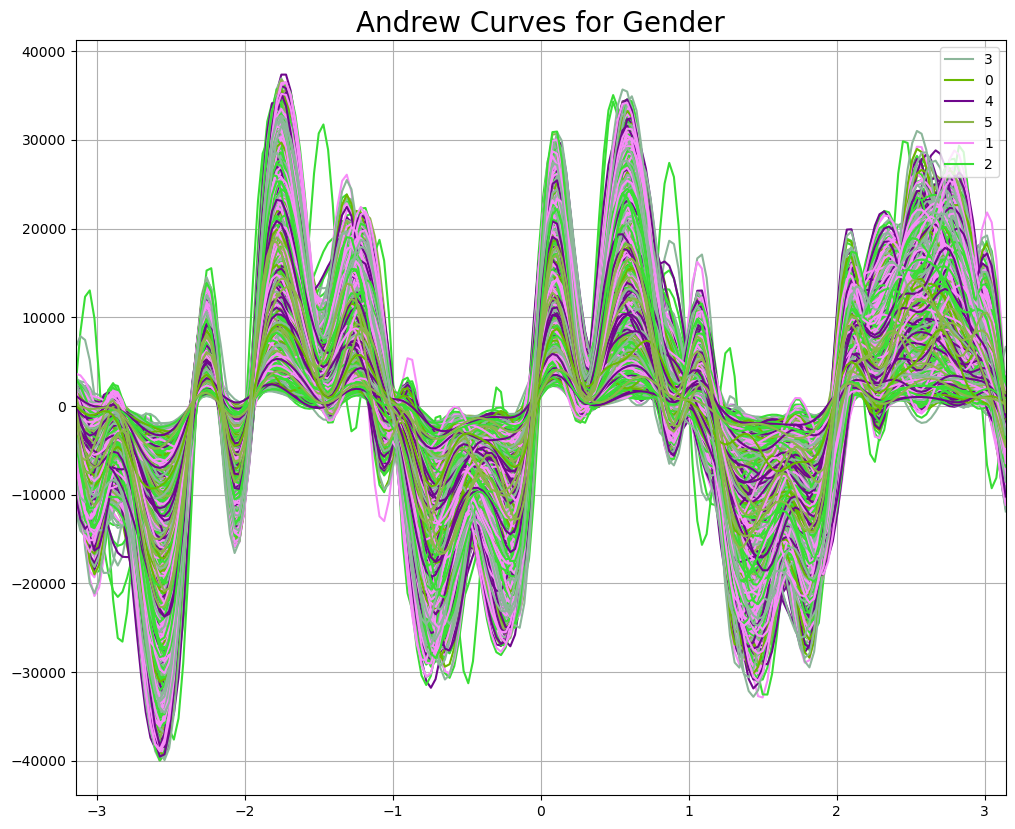

In [49]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=100)


pd.plotting.andrews_curves(df.sample(frac = 0.20).drop(['Id_client', 'Gender'], axis = 1).astype(int), 'Age_group')
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

## В теории можно еще применить метод локтя (он вроде самый популярный) и k-means.

### Elbow Method

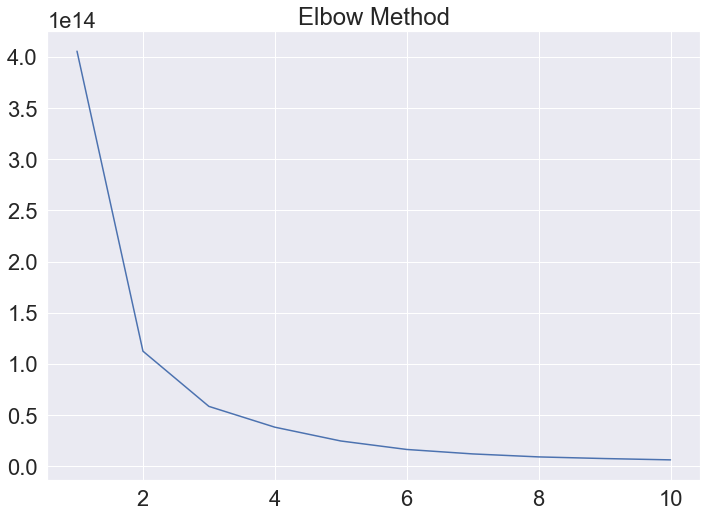

In [70]:
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=50)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
ks = range(1,11)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale = 2)
sns.lineplot(x=ks, y=wcss).set_title('Elbow Method');

### k-means

In [85]:
kdata = df.sample(frac = 0.15).values

km = KMeans(n_clusters=5, init = 'k-means++')
#наполняем объект
km.fit(kdata)
#центры
clusters = km.cluster_centers_
#предсказываем
y_km = km.fit_predict(kdata)

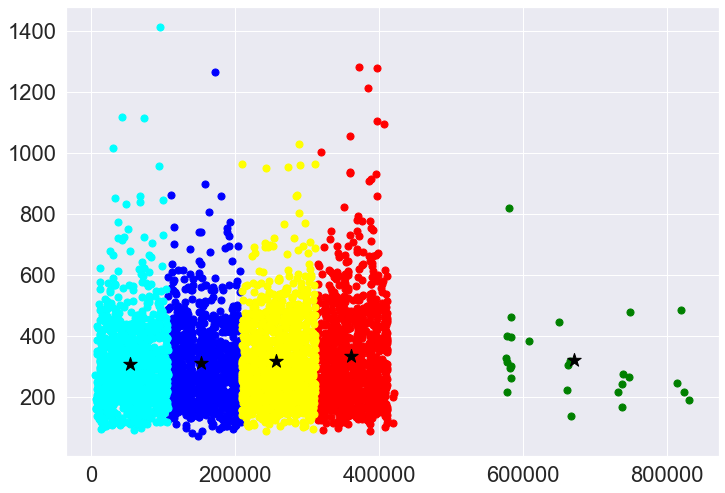

In [86]:
plt.scatter(kdata[y_km == 0,0], kdata[y_km == 0,1], s=50, color='red')
plt.scatter(kdata[y_km == 1,0], kdata[y_km == 1,1], s=50, color='blue')
plt.scatter(kdata[y_km == 2,0], kdata[y_km == 2,1], s=50, color='yellow')
plt.scatter(kdata[y_km == 3,0], kdata[y_km == 3,1], s=50, color='cyan')
plt.scatter(kdata[y_km == 4,0], kdata[y_km == 4,1], s=50, color='green')
plt.scatter(clusters[0][0], clusters[0][1], marker='*', s=200, color='black')
plt.scatter(clusters[1][0], clusters[1][1], marker='*', s=200, color='black')
plt.scatter(clusters[2][0], clusters[2][1], marker='*', s=200, color='black')
plt.scatter(clusters[3][0], clusters[3][1], marker='*', s=200, color='black')
plt.scatter(clusters[4][0], clusters[4][1], marker='*', s=200, color='black')



plt.show()